# 🐕 Dog Breed Identification System Using Deep Learning

## Problem

Identifying the breed of a dog given an image of a dog.

## Data

The data we're using is from Kaggle's dog breed identification competition.
Link: https://www.kaggle.com/c/dog-breed-identification/data

## Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.
Link: https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## Features
Some information about the data:

- We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
- There are 120 breeds of dogs (this means there are 120 different classes).
- There are around 10,000+ images in the training set (these images have labels).
- There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them).

In [1]:
# Unzip the files in Google Drive
#!unzip 'drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification.zip' -d 'drive/MyDrive/Colab Notebooks/Dog Vision/'

## Environment Setup

In [2]:
# Import tensorflow
import tensorflow as tf
import tensorflow_hub as hub
print('TF Version: ', tf.__version__)
print('TF Hub Version: ', hub.__version__)

# Check for GPU availability
print('GPU', 'Available (YES !)' if tf.config.list_physical_devices('GPU') else 'Not available !')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

TF Version:  2.4.1
TF Hub Version:  0.11.0
GPU Available (YES !)


## Data Preparation

In [3]:
labels_csv = pd.read_csv('drive/MyDrive/Colab Notebooks/Dog Vision/labels.csv')
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     9ca7fa5c1ec7340c2ede88de2a2c55cc  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


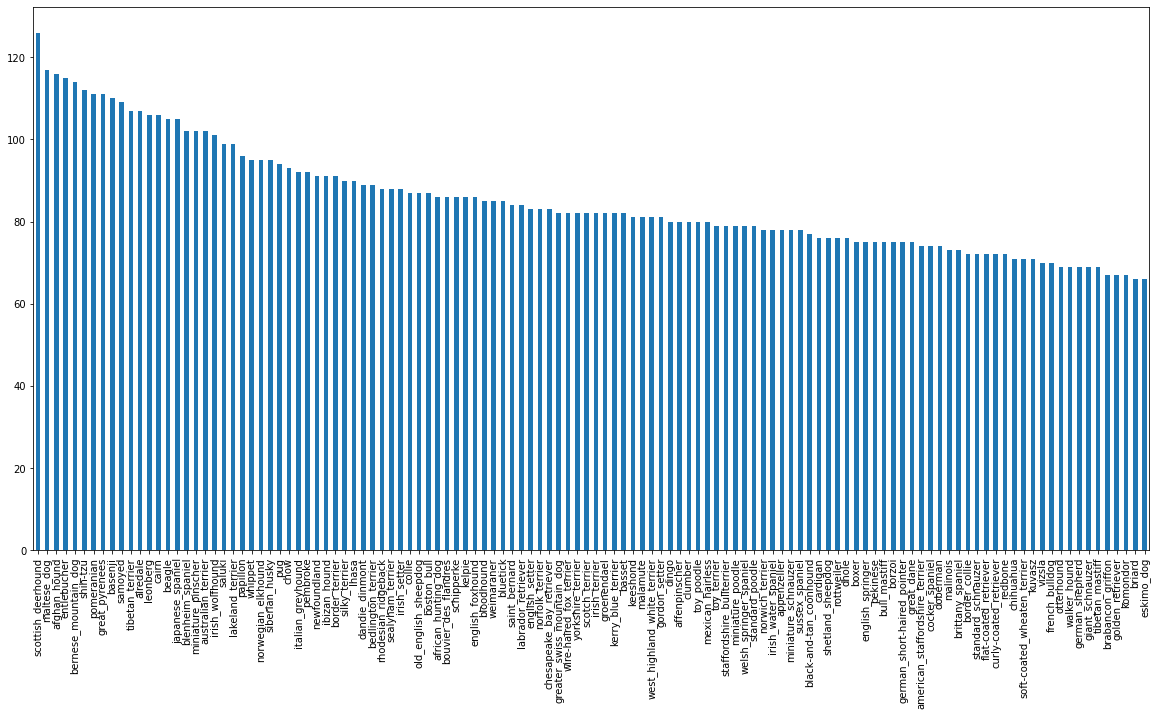

In [4]:
labels_csv['breed'].value_counts().plot.bar(figsize=(20, 10))

In [5]:
labels_csv['breed'].value_counts().median()

82.0

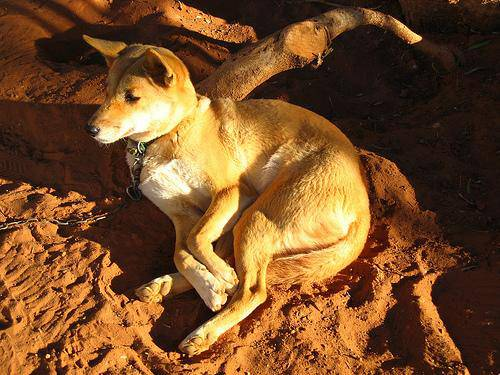

In [6]:
from IPython.display import Image
Image('drive/MyDrive/Colab Notebooks/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg')

In [7]:
# Getting images and their labels

# Create pathname from image IDs
filenames = ['drive/MyDrive/Colab Notebooks/Dog Vision/train/'+fname for fname in labels_csv['id']+'.jpg']
filenames[:10]

['drive/MyDrive/Colab Notebooks/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [8]:
# Check if number of filenames matches the number of actual image files
import os
if len(os.listdir('drive/MyDrive/Colab Notebooks/Dog Vision/train')) == len(filenames):
  print('Matching !')
else:
  print('Not Matching !')

Matching !


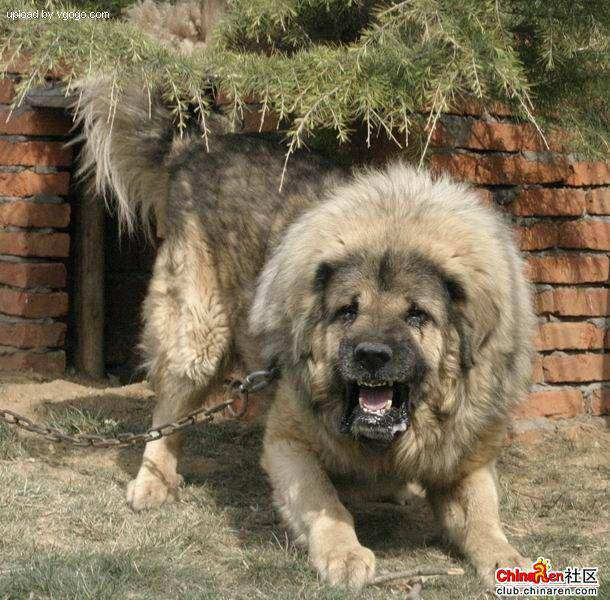

In [9]:
Image(filenames[9000])

In [10]:
labels_csv['breed'][9000]

'tibetan_mastiff'

In [11]:
labels = np.array(labels_csv['breed'])
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [12]:
len(labels)

10222

In [13]:
if len(labels) == len(filenames):
  print('Matching!')
else:
  print('Not Matching !')

Matching!


In [14]:
# Unique label values
unique_breed = np.unique(labels)
len(unique_breed)

120

In [15]:
# Turn labels into boolean
print(labels[0])
labels[0] == unique_breed

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [16]:
boolean_labels = [label == unique_breed for label in labels]

In [17]:
boolean_labels

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [18]:
len(boolean_labels)

10222

In [19]:
# Turning boolean labels into integers
print(labels[0])
print(np.where(unique_breed == labels[0])) # index where the label occurs
print(boolean_labels[0].argmax) # index where the label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
<built-in method argmax of numpy.ndarray object at 0x7fbd211bb490>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [20]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [21]:
# Creating validation set
X = filenames
y = boolean_labels

In [22]:
len(X)

10222

In [23]:
# Start experimenting with 1000 samples and then increase as needed

# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [24]:
# Split our data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.2, random_state=42)
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [25]:
X_train[:5]

['drive/MyDrive/Colab Notebooks/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg']

In [26]:
y_train[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

## Preprocessing Images (Turning images into Tensors)
1. Take image filepath as input
2. Use Tensorflow to read the file and save it to a variable, 'image'
3. Turn our 'image' (jpg) into Tensors
4. Resize the 'images' to be a shape of (224, 224)
5. Return the modified 'image'

In [27]:
# Convert an image to NumPy
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [28]:
image.max(), image.min()

(255, 0)

In [29]:
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

In [30]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  '''
  Takes an image file path and turns the image into a Tensor
  '''
  # Read an image file
  image = tf.io.read_file(image_path)

  # Turn the jpg imgae into numerical  Tensor with 3 color channels (RGB)
  image = tf.image.decode_jpeg(image, channels=3)

  # Convert the color channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)

  # Resize the image to our desired value
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

In [31]:
# Turning our data into batches

# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  '''
  Processes the image and returns a tuple of (image, label)
  '''
  image = process_image(image_path)
  return image, label